## Analyzing the Air bnb datasets for Seattle and Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date: 15 October 2020

#### Import the libraries 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the datasets

In [49]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [52]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


#### Seattle Datasets

In [53]:
seattle_df_listings = pd.read_csv(seattle_dir+'listings.csv')
seattle_df_calendar = pd.read_csv(seattle_dir+'calendar.csv')
seattle_df_reviews = pd.read_csv(seattle_dir+'reviews.csv')
print('Seattle datasets read...')

Seattle datasets read...


## EDA for both datasets

#### Datasets shapes

In [57]:
print('BOSTON')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 4)
Reviews dataset: (68275, 6)


In [58]:
print('SEATTLE')
print('Listings dataset: {}'.format(seattle_df_listings.shape))
print('Calendar dataset: {}'.format(seattle_df_calendar.shape))
print('Reviews dataset: {}'.format(seattle_df_reviews.shape))

SEATTLE
Listings dataset: (3818, 92)
Calendar dataset: (1393570, 4)
Reviews dataset: (84849, 6)


#### Nan values in the datasets

In [98]:
boston_nulls_listings = boston_df_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


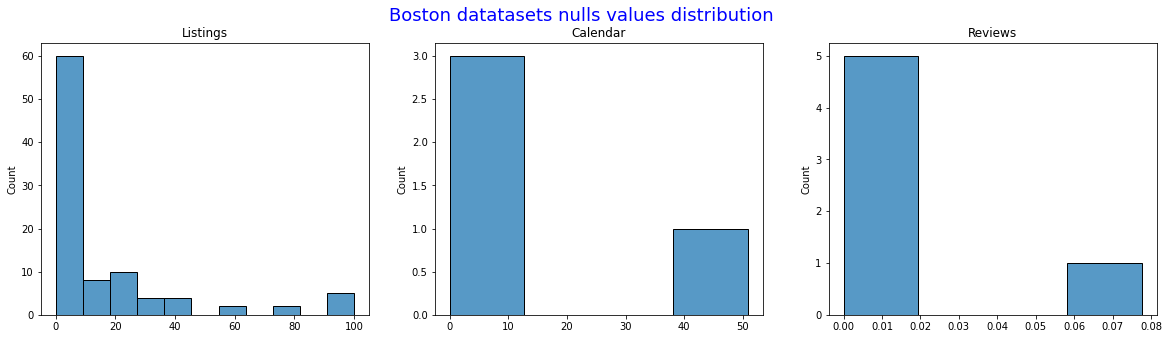

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

In [106]:
seattle_nulls_listings = seattle_df_listings.isnull().sum()/seattle_df_listings.shape[0]*100
seattle_nulls_calendar = seattle_df_calendar.isnull().sum()/seattle_df_calendar.shape[0]*100
seattle_nulls_reviews  = seattle_df_reviews.isnull().sum()/seattle_df_reviews.shape[0]*100

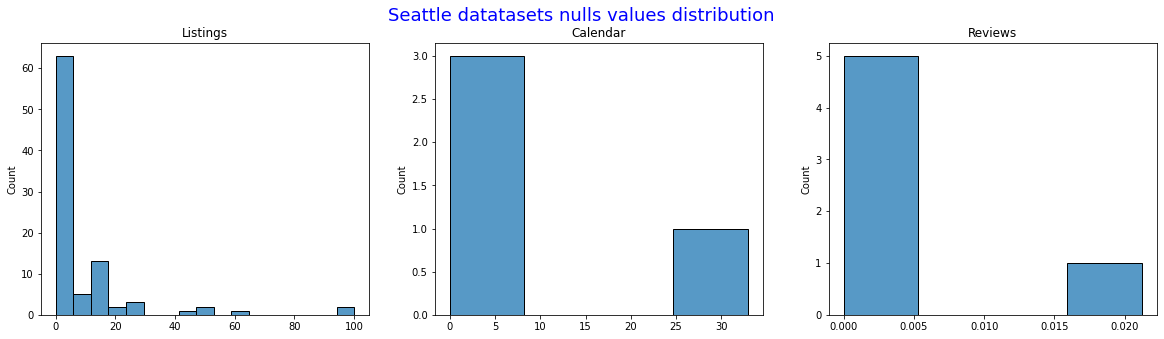

In [108]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Seattle datatasets nulls values distribution', fontsize=18, c='b')

sns.histplot(data=seattle_nulls_listings,x=seattle_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=seattle_nulls_calendar,x=seattle_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=seattle_nulls_reviews,x=seattle_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that in both cities Seattle and Boston the Listings datasets have the more columns with Nan values

#### Columns with more than 50% Nan Values

In [112]:
print('BOSTON')
print('Listings dataset columns with more than 50% Nan values')
boston_df_listings.columns[boston_nulls_listings >= 50]

BOSTON
Listings dataset columns with more than 50% Nan values


Index(['notes', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [113]:
print('SEATTLE')
print('Listings dataset columns with more than 50% Nan values')
seattle_df_listings.columns[seattle_nulls_listings >= 50]

SEATTLE
Listings dataset columns with more than 50% Nan values


Index(['square_feet', 'monthly_price', 'security_deposit', 'license'], dtype='object')